In [ ]:
# -- Check environment
# import sys
# print(sys.executable)

In [2]:
# Setup

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

In [3]:
# Import data

from pathlib import Path
cwd = Path.cwd()
datapath = (cwd.parent / 'data/').resolve()

df = pd.read_csv(datapath / 'RecessionTimingRawData2024.csv')

In [4]:
# Set up columns

df.loc[df.rec==1,"rectime"] = 0
for i in range(1,150):
    df.loc[df.rec==0,"rectime"] = df.rectime.shift(-1) + 1
# df["lnrectime"] = np.log(df.rectime)
df["sqrtrectime"] = np.sqrt(df.rectime)

df['urma'] = df.ur.rolling(6).mean()

for i in (0,1,3,6,12):
    for var in ("ur",):
        if (i>0): df["s"+str(i)+"_"+var] = df[var].diff(i)
        df["l"+str(i)+"_"+var] = df[var].shift(i)
    for var in ('emp','sp500','ip'):
        if (i==0):
            df["ln"+var] = np.log(df[var])
        else:
            df["s"+str(i)+"_ln"+var] = np.log(df[var]).diff(i)
            df["l"+str(i)+"_ln"+var] = np.log(df[var]).shift(i)

for i in (1,2,3,4,5,6):
    for var in ('r10yr','rff','rbaa','r3mo','r1yr','r3yr','r5yr'):
        df["l"+str(i)+"_"+var] = df[var].shift(i)

df["rbaar10yr"] = df.rbaa - df.r10yr
df["r10yrr3yr"] = df.r10yr - df.r3yr
df["s3_r10yrr3yr"] = df.r10yrr3yr.diff(3)
# df["s12_rff"] = df.rff.diff(i) # not enough history...
        
df.head(24)

,period,r10yr,rff,rbaa,r3mo,r1yr,r3yr,r5yr,rec,rec12mo,...,l6_r10yr,l6_rff,l6_rbaa,l6_r3mo,l6_r1yr,l6_r3yr,l6_r5yr,rbaar10yr,r10yrr3yr,s3_r10yrr3yr
0,4/1/1953,2.83,NaN,3.65,2.19,2.36,2.51,2.62,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.82,0.32,NaN
1,5/1/1953,3.05,NaN,3.78,2.16,2.48,2.72,2.87,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.73,0.33,NaN
2,6/1/1953,3.11,NaN,3.86,2.11,2.45,2.74,2.94,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.75,0.37,NaN
3,7/1/1953,2.93,NaN,3.86,2.04,2.38,2.62,2.75,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.93,0.31,-0.01
4,8/1/1953,2.95,NaN,3.85,2.04,2.28,2.58,2.80,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.90,0.37,0.04
5,9/1/1953,2.87,NaN,3.88,1.79,2.20,2.56,2.71,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.01,0.31,-0.06
6,10/1/1953,2.66,NaN,3.82,1.38,1.79,2.23,2.43,1.0,1.0,...,2.83,NaN,3.65,2.19,2.36,2.51,2.62,1.16,0.43,0.12
7,11/1/1953,2.68,NaN,3.75,1.44,1.67,2.20,2.42,1.0,1.0,...,3.05,NaN,3.78,2.16,2.48,2.72,2.87,1.07,0.48,0.11
8,12/1/1953,2.59,NaN,3.74,1.60,1.66,2.07,2.32,1.0,1.0,...,3.11,NaN,3.86,2.11,2.45,2.74,2.94,1.15,0.52,0.21
9,1/1/1954,2.48,NaN,3.71,1.18,1.41,1.89,2.17,1.0,1.0,...,2.93,NaN,3.86,2.04,2.38,2.62,2.75,1.23,0.59,0.16


In [15]:
df.columns

Index(['period', 'r10yr', 'rff', 'rbaa', 'r3mo', 'r1yr', 'r3yr', 'r5yr', 'rec',
       'rec12mo',
       ...
       'l6_r10yr', 'l6_rff', 'l6_rbaa', 'l6_r3mo', 'l6_r1yr', 'l6_r3yr',
       'l6_r5yr', 'rbaar10yr', 'r10yrr3yr', 's3_r10yrr3yr'],
      dtype='object', length=101)

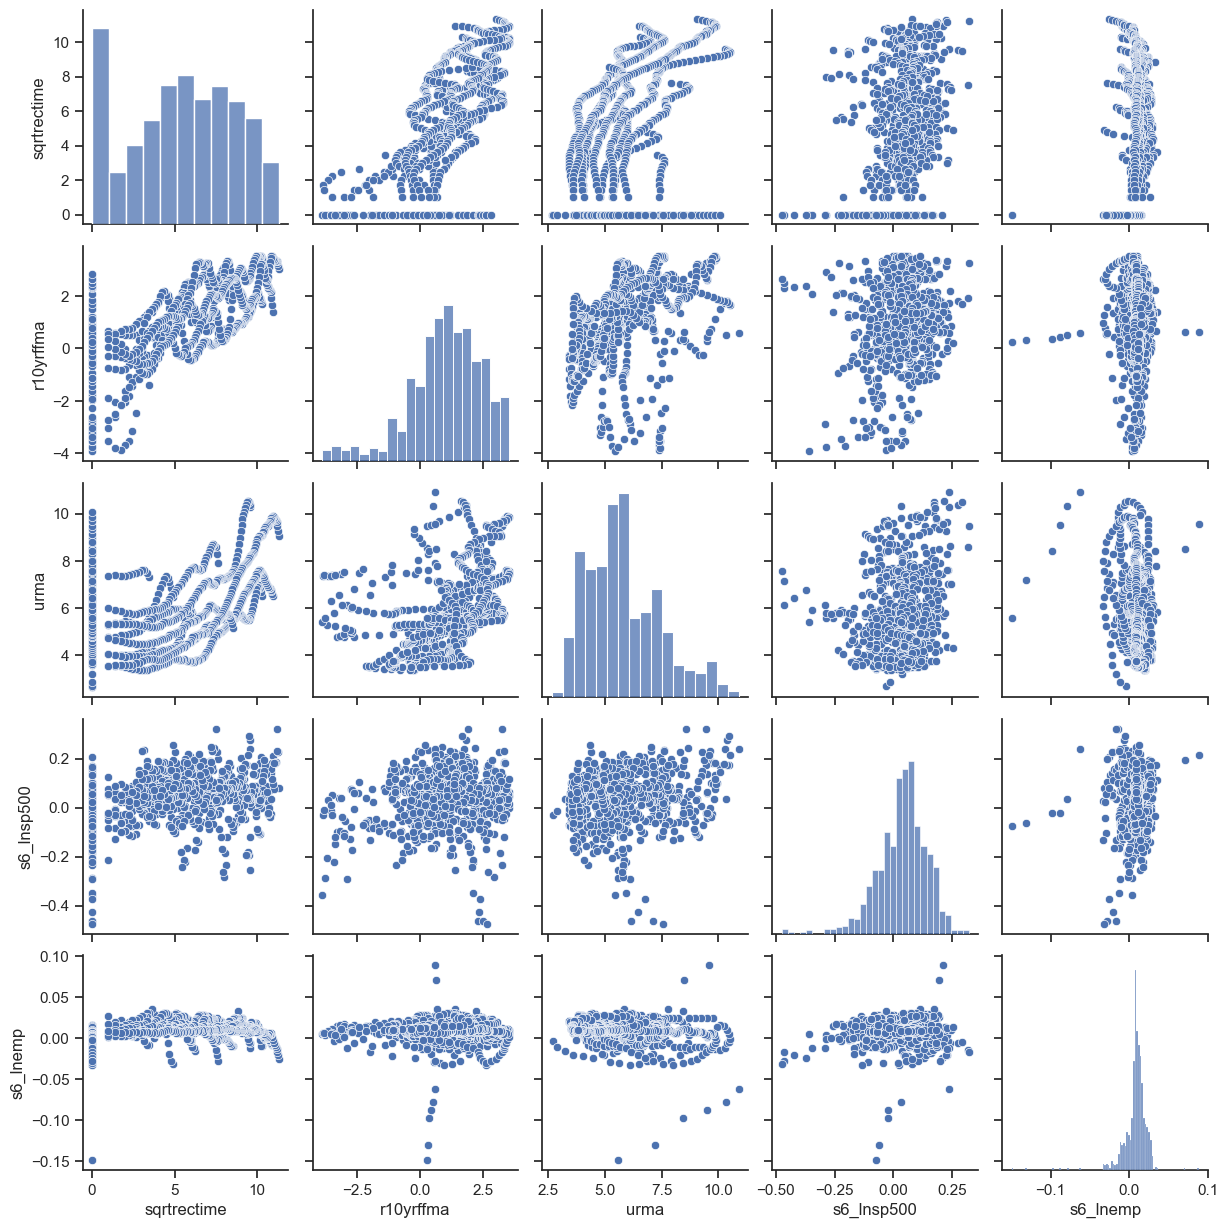

In [6]:
import seaborn as sns
sns.set_theme(style="ticks")

dfsns = df[["sqrtrectime","r10yrffma","urma","s6_lnsp500","s6_lnemp"]]

sns.pairplot(dfsns) #, hue="species")

In [7]:
# Select subset of data

# xlist = ['r10yrffma','r10yr','rff','rbaa','r3mo','r1yr','r3yr','r5yr','ur','s6_lnsp500','s6_lnemp','s6_lnip','s6_ur','s12_ur','s12_lnemp','s12_lnsp500','s12_lnip']
# xlist = ['r10yrffma','rbaar10yr','r10yrr3yr','r10yr','rff','rbaa','r3mo','r1yr','r3yr','r5yr','ur','s3_ur','s3_lnemp','s3_lnsp500','s6_lnsp500','s6_lnemp','s6_lnip','s6_ur','s12_ur','s12_lnemp','s12_lnsp500','s12_lnip']
# xlist = ['r10yrffma','s6_lnsp500','s6_lnemp']
# xlist = ['r10yrffma','s6_lnsp500','s6_lnemp','s3_ur','s6_lnip','rbaar10yr','r10yrr3yr']
# xlist = ['lnemp','l6_lnemp','l12_lnemp','ur','l6_ur','l12_ur','lnsp500','l6_lnsp500','l12_lnsp500','lnip','l6_lnip','l12_lnip','r10yr','l6_r10yr','rff','l5_rff','rbaa','l6_rbaa','r3yr','l6_r3yr'] # 'l6_rff',
xlist = ['r10yrffma','urma','s6_lnsp500','s6_lnemp']

# df2_oos = df[["period","rec12mo"]+xlist][~np.isnan(df.r10yrffma) & np.isnan(df.rec)]
# df2_oos = df[["period","rec12mo"]+xlist][df.index>=779] # 791
df2_oos = df[["period","sqrtrectime"]+xlist][df.index>=779] # 791
df2_valid = df2_oos[df2_oos.index<=804]

# df2 = df[["period","rec12mo"]+xlist][~np.isnan(df.r10yrffma) & ~np.isnan(df.rec)]
# df2 = df[["period","rec12mo"]+xlist][~np.isnan(df.r10yrffma) & ~np.isnan(df.rec)]
df2 = df[["period","sqrtrectime"]+xlist][~np.isnan(df.r10yrffma) & ~np.isnan(df.rec)]
df2 = df2[df2.index<779]
df2

,period,sqrtrectime,r10yrffma,urma,s6_lnsp500,s6_lnemp
20,12/1/1954,5.744563,1.40,5.650000,0.189718,0.008878
21,1/1/1955,5.656854,1.36,5.500000,0.166824,0.013445
22,2/1/1955,5.567764,1.39,5.283333,0.179987,0.016615
23,3/1/1955,5.477226,1.40,5.033333,0.148913,0.021772
24,4/1/1955,5.385165,1.35,4.866667,0.159905,0.026335
...,...,...,...,...,...,...
774,10/1/2017,5.385165,1.17,4.316667,0.080465,0.006634
775,11/1/2017,5.291503,1.14,4.283333,0.079521,0.006713
776,12/1/2017,5.196152,1.13,4.250000,0.090424,0.006345
777,1/1/2018,5.099020,1.13,4.200000,0.128210,0.006079


In [8]:
df2.columns

Index(['period', 'sqrtrectime', 'r10yrffma', 'urma', 's6_lnsp500', 's6_lnemp'], dtype='object')

In [ ]:
# Scatter plot of SP500 vs Emp (during recessions and expansions)

# fig, ax = plt.subplots()
# sc = df2.plot.scatter(x='s6_lnsp500', y='r10yrffma', c='rec12mo', colormap='winter', ax=ax) # rainbow

In [ ]:
# axes = pd.plotting.scatter_matrix(df2, alpha = 0.2, figsize = (9, 9), range_padding = 0.15)

In [9]:
from sklearn.model_selection import train_test_split

y = df2["sqrtrectime"]
X = df2[xlist]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 0.33

y_valid = df2_valid["sqrtrectime"]
X_valid = df2_valid[xlist]

y_oos = df2_oos["sqrtrectime"]
X_oos = df2_oos[xlist]

In [10]:
# Scale

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train)
X_train = pd.DataFrame(ss.transform(X_train), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(ss.transform(X_test), columns=X_test.columns, index=X_test.index)
X_valid = pd.DataFrame(ss.transform(X_valid), columns=X_valid.columns, index=X_valid.index)
X_oos = pd.DataFrame(ss.transform(X_oos), columns=X_oos.columns, index=X_oos.index)
X = pd.DataFrame(ss.transform(X), columns=X.columns, index=X.index)

print(ss.scale_)

[1.54151695 1.52226587 0.10695155 0.01089389]


In [11]:
# Import Models: Logistic, Random Forest, SVC, Voting Classifier

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

In [12]:
# Run linear reg, random forest reg, gradient boosting reg, voting reg
# As baseline to compare to NN

gbr = GradientBoostingRegressor(random_state=42)
rfr = RandomForestRegressor(random_state=42)
lir = LinearRegression()
vor = VotingRegressor(estimators=[('gb', gbr), ('rf', rfr), ('li', lir)])

kf = KFold(n_splits=2)

for reg in (gbr, rfr, lir, vor):
    # reg.fit(X_train, y_train)
    # y_pred = reg.predict(X_test)
    cvscores = cross_val_score(reg, X, y, cv=kf, scoring='neg_mean_squared_error') # 'neg_mean_absolute_error'
    # print(reg.__class__.__name__, "cv:   ", cvscores.mean())
    reg.fit(X, y)
    y_pred_valid = reg.predict(X_valid)
    print(reg.__class__.__name__, "cv:", cvscores.mean(), "valid:", mean_squared_error(y_valid, y_pred_valid)) # mean_absolute_error


GradientBoostingRegressor cv: -5.665606663038717 valid: 1.3730789414020634
RandomForestRegressor cv: -5.661880975730492 valid: 1.6786497109255276
LinearRegression cv: -6.237197720351236 valid: 3.976806241517093
VotingRegressor cv: -5.009363336730045 valid: 1.550226291785123


In [14]:
# feature importances (from random forest)

for name, score in zip(list(X), rfr.feature_importances_):
    print(name,":", round(score,2))

r10yrffma : 0.47
urma : 0.15
s6_lnsp500 : 0.07
s6_lnemp : 0.3


In [78]:
# use RandomizedSearchCV (or GridSearchCV) to search through hyperparameters to find the best one via CV
# for now use KFold (not random), but might need to do stratified or random...

from sklearn.model_selection import GridSearchCV

parameter_space = {
    'hidden_layer_sizes': [(20,10), (20,10,5), (10,20,10), (30,20,10), (10,5), (5,10)],
    'activation': ['relu','logistic','tanh'],
    'solver': ['sgd', 'adam', 'lbfgs'],
    'alpha': [0.001, 0.01, 1], # 0.0001, 
    # 'learning_rate': ['constant'], # adaptive same as constant... # ,'adaptive'
}

kf = KFold(n_splits=2) # StratifiedKFold(n_splits=5) # KFold(n_splits=2) # 5 # k consecutive folds (without shuffling)

mlp = MLPRegressor(random_state=42,max_iter=1000) # 100
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=kf, verbose=1, scoring='neg_mean_squared_error') # 'neg_mean_absolute_error')
clf.fit(X, y)

print('Best parameters:\n', clf.best_params_)
print('Best score:\n', clf.best_score_)


Fitting 2 folds for each of 162 candidates, totalling 324 fits
Best parameters:
 {'activation': 'relu', 'alpha': 1, 'hidden_layer_sizes': (5, 10), 'solver': 'sgd'}
Best score:
 -3.079092742660886


C:\Users\rtaylor\AppData\Local\pypoetry\Cache\virtualenvs\rec-nVv3EI5N-py3.12\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

In [79]:
# run sep with specs from above
# {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (10, 5), 'solver': 'sgd'}
# {'activation': 'tanh', 'alpha': 1, 'hidden_layer_sizes': (10, 5), 'solver': 'sgd'} # neg_mean_squared_error
# {'activation': 'logistic', 'alpha': 0.001, 'hidden_layer_sizes': (5, 10), 'solver': 'sgd'} # removed ip
# {'activation': 'relu', 'alpha': 1, 'hidden_layer_sizes': (5, 10), 'solver': 'sgd'} # urma lnemp

kf = KFold(n_splits=2) # KFold(n_splits=2) # kf

mlp_clf3 = MLPRegressor(hidden_layer_sizes=[5,10],random_state=42,max_iter=1000,activation='relu',solver='sgd',alpha=1)
cvscores = cross_val_score(mlp_clf3, X, y, cv=kf, scoring='neg_mean_squared_error') # 'neg_mean_absolute_error')
print(mlp_clf3.__class__.__name__, "cv:   ", cvscores.mean())
# mlp_clf3.fit(X_train, y_train)
mlp_clf3.fit(X, y)
y_pred_valid = mlp_clf3.predict(X_valid) # X_valid_notss # X_valid
print(mlp_clf3.__class__.__name__, "valid:", mean_squared_error(y_valid, y_pred_valid)) # mean_absolute_error # accuracy_score

# maybe try:
# changing the number of kfolds?
# randomness/stratification?
# essentially need to get results that are good on validation (logistic, 20,10, lbfgs, alpha=1, etc.)


C:\Users\rtaylor\AppData\Local\pypoetry\Cache\virtualenvs\rec-nVv3EI5N-py3.12\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\rtaylor\AppData\Local\pypoetry\Cache\virtualenvs\rec-nVv3EI5N-py3.12\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor cv:    -3.079092742660886
MLPRegressor valid: 2.408256290993961


C:\Users\rtaylor\AppData\Local\pypoetry\Cache\virtualenvs\rec-nVv3EI5N-py3.12\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
import itertools
# list(itertools.permutations([5, 10, 15, 20]))
# layerlist = list(itertools.product([5, 10, 15, 20, 25], repeat=3))
layerlist = list(itertools.product([1,2,3,4,5,6,7,8,9,10,11,12], repeat=2))
layerlist

In [80]:
# Grid Search Round II
# {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (10, 5), 'solver': 'sgd'}
# {'activation': 'tanh', 'alpha': 1, 'hidden_layer_sizes': (10, 5), 'solver': 'sgd'} # neg_mean_squared_error
# {'activation': 'logistic', 'alpha': 0.001, 'hidden_layer_sizes': (5, 10), 'solver': 'sgd'} # removed ip
# {'activation': 'relu', 'alpha': 1, 'hidden_layer_sizes': (5, 10), 'solver': 'sgd'} # urma lnemp

from sklearn.model_selection import GridSearchCV

# layerlist = list(itertools.product([5, 10, 15, 20, 25], repeat=3))
# layerlist = list(itertools.product([5, 10, 15, 20], repeat=4))

parameter_space = {
    # 'hidden_layer_sizes': [(5,5), (10,5), (15,5), (20,5), (25,5), (30,5), (5,10), (10,10), (15,10), (20,10), (25,10), (30,10), (5,15), (10,15), (15,15), (20,15), (25,15), (30,15), (5,20), (10,20), (15,20), (20,20), (25,20), (30,20), (5,25), (10,25), (15,25), (20,25), (25,25), (30,25), (5,30), (10,30), (15,30), (20,30), (25,30), (30,30),],
    # 'hidden_layer_sizes': [(5,5,5), (5,5,10), (5,5,15), (5,5,20), (5,10,5), (5,10,10), (5,10,15), (5,10,20), (5,15,5), (5,15,10), (5,15,15), (5,15,20), (5,20,5), (5,20,10), (5,20,15), (5,20,20), (10,5,5), (10,5,10), (10,5,15), (10,5,20), (10,10,5), (10,10,10), (10,10,15), (10,10,20), (10,15,5), (10,15,10), (10,15,15), (10,15,20), (10,20,5), (10,20,10), (10,20,15), (10,20,20), (15,5,5), (15,5,10), (15,5,15), (15,5,20), (15,10,5), (15,10,10), (15,10,15), (15,10,20), (15,15,5), (15,15,10), (15,15,15), (15,15,20), (15,20,5), (15,20,10), (15,20,15), (15,20,20), (20,5,5), (20,5,10), (20,5,15), (20,5,20), (20,10,5), (20,10,10), (20,10,15), (20,10,20), (20,15,5), (20,15,10), (20,15,15), (20,15,20), (20,20,5), (20,20,10), (20,20,15), (20,20,20),],
    # 'hidden_layer_sizes': [(5,5,5,5), (5,5,5,10), (5,5,10,5), (5,5,10,10), (5,10,5,5), (5,10,5,10), (5,10,10,5), (5,10,10,10), (10,5,5,5), (10,5,5,10), (10,5,10,5), (10,5,10,10), (10,10,5,5), (10,10,5,10), (10,10,10,5), (10,10,10,10),],
    # 'hidden_layer_sizes': [(3,3,8), (3,3,9), (3,3,10), (3,3,11), (3,3,12), (3,4,8), (3,4,9), (3,4,10), (3,4,11), (3,4,12), (3,5,8), (3,5,9), (3,5,10), (3,5,11), (3,5,12), (3,6,8), (3,6,9), (3,6,10), (3,6,11), (3,6,12), (3,7,8), (3,7,9), (3,7,10), (3,7,11), (3,7,12), (4,3,8), (4,3,9), (4,3,10), (4,3,11), (4,3,12), (4,4,8), (4,4,9), (4,4,10), (4,4,11), (4,4,12), (4,5,8), (4,5,9), (4,5,10), (4,5,11), (4,5,12), (4,6,8), (4,6,9), (4,6,10), (4,6,11), (4,6,12), (4,7,8), (4,7,9), (4,7,10), (4,7,11), (4,7,12), (5,3,8), (5,3,9), (5,3,10), (5,3,11), (5,3,12), (5,4,8), (5,4,9), (5,4,10), (5,4,11), (5,4,12), (5,5,8), (5,5,9), (5,5,10), (5,5,11), (5,5,12), (5,6,8), (5,6,9), (5,6,10), (5,6,11), (5,6,12), (5,7,8), (5,7,9), (5,7,10), (5,7,11), (5,7,12), (6,3,8), (6,3,9), (6,3,10), (6,3,11), (6,3,12), (6,4,8), (6,4,9), (6,4,10), (6,4,11), (6,4,12), (6,5,8), (6,5,9), (6,5,10), (6,5,11), (6,5,12), (6,6,8), (6,6,9), (6,6,10), (6,6,11), (6,6,12), (6,7,8), (6,7,9), (6,7,10), (6,7,11), (6,7,12), (7,3,8), (7,3,9), (7,3,10), (7,3,11), (7,3,12), (7,4,8), (7,4,9), (7,4,10), (7,4,11), (7,4,12), (7,5,8), (7,5,9), (7,5,10), (7,5,11), (7,5,12), (7,6,8), (7,6,9), (7,6,10), (7,6,11), (7,6,12), (7,7,8), (7,7,9), (7,7,10), (7,7,11), (7,7,12),], 
    # 'hidden_layer_sizes': [(2,16), (2,17), (2,18), (2,19), (2,20), (2,21), (2,22), (2,23), (2,24), (3,16), (3,17), (3,18), (3,19), (3,20), (3,21), (3,22), (3,23), (3,24), (4,16), (4,17), (4,18), (4,19), (4,20), (4,21), (4,22), (4,23), (4,24), (5,16), (5,17), (5,18), (5,19), (5,20), (5,21), (5,22), (5,23), (5,24), (6,16), (6,17), (6,18), (6,19), (6,20), (6,21), (6,22), (6,23), (6,24), (7,16), (7,17), (7,18), (7,19), (7,20), (7,21), (7,22), (7,23), (7,24), (8,16), (8,17), (8,18), (8,19), (8,20), (8,21), (8,22), (8,23), (8,24), (9,16), (9,17), (9,18), (9,19), (9,20), (9,21), (9,22), (9,23), (9,24),],
    'hidden_layer_sizes': layerlist,
    'activation': ['relu'], # 'logistic','relu','tanh'
    'solver': ['sgd'], # ['sgd', 'adam', 'lbfgs'],
    'alpha': [1], # , 0.01, 1], # 0.0001, 
    # 'learning_rate': ['constant'], # adaptive same as constant... # ,'adaptive'
}

kf = KFold(n_splits=2) # StratifiedKFold(n_splits=5) # KFold(n_splits=2) # 5 # k consecutive folds (without shuffling)

mlp = MLPRegressor(random_state=42,max_iter=1000) # 100
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=kf, verbose=1, scoring='neg_mean_squared_error') # 'neg_mean_absolute_error')
clf.fit(X, y)

print('Best parameters:\n', clf.best_params_)
print('Best score:\n', clf.best_score_)


Fitting 2 folds for each of 144 candidates, totalling 288 fits
Best parameters:
 {'activation': 'relu', 'alpha': 1, 'hidden_layer_sizes': (8, 8), 'solver': 'sgd'}
Best score:
 -3.0237715397306983


In [ ]:
# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

In [86]:
# {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (10, 5), 'solver': 'sgd'}
# {'activation': 'tanh', 'alpha': 1, 'hidden_layer_sizes': (4, 11), 'solver': 'sgd'} # neg_mean_squared_error
# {'activation': 'logistic', 'alpha': 0.001, 'hidden_layer_sizes': (9, 12), 'solver': 'sgd'} # no ip
# {'activation': 'relu', 'alpha': 1, 'hidden_layer_sizes': (8, 8), 'solver': 'sgd'} # urma lnemp

# print(clf.best_params_)
# print(clf.best_score_)

# X_valid_notss = df2_valid[xlist]

mlp_clf3 = MLPRegressor(hidden_layer_sizes=[8,8],random_state=42,max_iter=1000,activation='relu',solver='sgd',alpha=1)
# cvscores = cross_val_score(mlp_clf3, X, y, cv=kf, scoring='neg_mean_absolute_error')
scores = cross_validate(mlp_clf3, X, y, cv=kf, scoring='neg_mean_squared_error', return_indices=True, return_estimator=True) # 'neg_mean_absolute_error'
cvscores = scores['test_score']
# print(sorted(scores.keys())) # ['fit_time', 'indices', 'score_time', 'test_score']

print(mlp_clf3.__class__.__name__, "cv:   ", cvscores.mean())
# mlp_clf3.fit(X_train, y_train)
mlp_clf3.fit(X, y)
y_pred_valid = mlp_clf3.predict(X_valid) # X_valid_notss # X_valid
print(mlp_clf3.__class__.__name__, "valid:", mean_squared_error(y_valid, y_pred_valid)) # mean_absolute_error

C:\Users\rtaylor\AppData\Local\pypoetry\Cache\virtualenvs\rec-nVv3EI5N-py3.12\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\rtaylor\AppData\Local\pypoetry\Cache\virtualenvs\rec-nVv3EI5N-py3.12\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor cv:    -3.0237715397306983
MLPRegressor valid: 1.0949654947563252


In [82]:
# is there a way to get the (avg) CV prediction in the validation set?
# might have to do it manually

mlpcv0 = scores['estimator'][0]
mlpcv1 = scores['estimator'][1]

# validation

y_pred_valid0 = mlpcv0.predict(X_valid) # X_valid_notss # X_valid
print(mlpcv0.__class__.__name__, "(cv0) valid:", mean_squared_error(y_valid, y_pred_valid0)) # mean_absolute_error

y_pred_valid1 = mlpcv1.predict(X_valid) # X_valid_notss # X_valid
print(mlpcv1.__class__.__name__, "(cv1) valid:", mean_squared_error(y_valid, y_pred_valid1)) # mean_absolute_error

y_pred_valid_cv = (y_pred_valid0 + y_pred_valid1)/2
print(mlp_clf3.__class__.__name__, "(cv) valid:", mean_squared_error(y_valid, y_pred_valid_cv)) # mean_absolute_error

# oos

y_pred_oos0 = mlpcv0.predict(X_oos)
y_pred_oos1 = mlpcv1.predict(X_oos)
y_pred_oos_cv = (y_pred_oos0 + y_pred_oos1)/2

MLPRegressor (cv0) valid: 2.1904587455640376
MLPRegressor (cv1) valid: 0.9190721420241583
MLPRegressor (cv) valid: 1.0367845736163883


In [ ]:
# x this looks like a pretty good process
# x in a new copy of this file:
# x try a mlp reg on time until recession?
# x maybe spend a day on it and see if any issues
# cv works well (avg of both cv models for valid/oos prediction)
# make a rectime v3:
# try to widdle done X variables and run through nn mlp process again...
# mlp (starting broad for hyperparameter grid search, then narrow)

# then load cre data set 
# have 0/1 dummies for property type, subtype (or do later...)
# use larger econ data set (hhinc, rs, etc.), as well as wfh proxy
# prob don't need to add mkt size dummies since emp can be used to proxy it if needed by the nn


In [ ]:
print(mlp_clf3.coefs_)
print(mlp_clf3.intercepts_)

In [83]:
# pred_valid = model.predict(X_valid)
# dfpred_valid = pd.DataFrame(pred_valid, index = df2_valid.index.values)

pred_valid = mlp_clf3.predict(X_valid) # svm_clf mlp_clf2
dfpred_valid = pd.DataFrame(pred_valid, index = df2_valid.index.values)
dfpred_valid2 = pd.DataFrame(y_pred_valid_cv, index = df2_valid.index.values)
xb_valid = pd.concat([df2_valid,dfpred_valid,dfpred_valid2], axis=1)
xb_valid

,period,sqrtrectime,r10yrffma,urma,s6_lnsp500,s6_lnemp,0,0
779,3/1/2018,4.898979,1.24,4.100000,0.080855,0.008677,4.367566,4.535176
780,4/1/2018,4.795832,1.24,4.066667,0.037094,0.008661,4.157500,4.424022
781,5/1/2018,4.690416,1.25,4.000000,0.040753,0.009320,4.068613,4.331013
782,6/1/2018,4.582576,1.25,3.983333,0.033225,0.009761,4.025029,4.300031
783,7/1/2018,4.472136,1.22,3.950000,0.001375,0.009141,3.851252,4.207360
784,8/1/2018,4.358899,1.14,3.900000,0.054898,0.008206,3.954814,4.217148
785,9/1/2018,4.242641,1.09,3.850000,0.070951,0.007264,3.917442,4.177431
786,10/1/2018,4.123106,1.06,3.816667,0.048485,0.007377,3.795186,4.136318
787,11/1/2018,4.000000,1.00,3.816667,0.008015,0.005811,3.653309,3.668758
788,12/1/2018,3.872983,0.91,3.800000,-0.070323,0.005596,3.267858,3.012062


In [84]:
# pred_oos = log_clf.predict_proba(X_oos)
# dfpred_oos = pd.DataFrame(pred_oos, index = df2_oos.index.values)

pred_oos = mlp_clf3.predict(X_oos) # svm_clf mlp_clf2
dfpred_oos = pd.DataFrame(pred_oos, index = df2_oos.index.values)
dfpred_oos2 = pd.DataFrame(y_pred_oos_cv, index = df2_oos.index.values)
xb_oos = pd.concat([df2_oos,dfpred_oos,dfpred_oos2], axis=1)
xb_oos.tail(48)

,period,sqrtrectime,r10yrffma,urma,s6_lnsp500,s6_lnemp,0,0
805,5/1/2020,NaN,0.32,7.183333,-0.061531,-0.131031,-1.732796,-2.003664
806,6/1/2020,NaN,0.37,8.416667,-0.022954,-0.097761,-1.326782,-1.498673
807,7/1/2020,NaN,0.43,9.516667,-0.021766,-0.087977,-1.594372,-1.025869
808,8/1/2020,NaN,0.53,10.333333,0.034310,-0.078756,-1.689838,-0.148946
809,9/1/2020,NaN,0.59,10.900000,0.238119,-0.062045,0.274069,0.297825
810,10/1/2020,NaN,0.61,9.566667,0.213315,0.088525,5.495731,6.449493
811,11/1/2020,NaN,0.63,8.483333,0.195212,0.070522,4.552190,5.473189
812,12/1/2020,NaN,0.67,7.766667,0.174160,0.034718,4.916755,5.704169
813,1/1/2021,NaN,0.74,7.133333,0.167826,0.026058,5.295078,5.556988
814,2/1/2021,NaN,0.85,6.766667,0.135385,0.018782,5.707394,5.614425


In [ ]:
# try tf

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# from autils import *
%matplotlib inline

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)


In [ ]:
print ('The shape of X is: ' + str(X_train.shape))
print ('The shape of y is: ' + str(y_train.shape))

In [ ]:
# UNQ_C1
# GRADED CELL: Sequential model

model = Sequential(
    [               
        # tf.keras.Input(shape=(607,)),    #specify input size
        ### START CODE HERE ### 
        tf.keras.layers.Dense(8, activation="sigmoid"),
        tf.keras.layers.Dense(22, activation="sigmoid"),
        tf.keras.layers.Dense(1, activation="sigmoid")
        ### END CODE HERE ### 
    ], name = "my_model" 
)       

In [ ]:
model.summary()

In [ ]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
)

model.fit(
    X_train,y_train,
    epochs=100, verbose=0
)

# see what epochs/loss/optimizer etc options there are too change around...
# prob need hyperparameter tuning...?
# might need to set up cross validation in the test sets still though...

In [ ]:
# y_pred = model.predict(X_test)
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(model.__class__.__name__, accuracy_score(y_test, y_pred))

y_pred_valid = (model.predict(X_valid) > 0.5).astype("int32")
print(model.__class__.__name__, accuracy_score(y_valid, y_pred_valid))

In [ ]:
# Model: Decision Tree

from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred = tree_clf.predict(X_test)
print(tree_clf.__class__.__name__, accuracy_score(y_test, y_pred))

In [ ]:
# Model: Bagging ensembles (of Decision Trees)

from sklearn.ensemble import BaggingClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=350, bootstrap=True, n_jobs=-1, random_state=42) # 100
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
print(bag_clf.__class__.__name__, accuracy_score(y_test, y_pred))

In [ ]:
# AdaBoost

from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2), n_estimators=200, # 2 200
    learning_rate=0.5, random_state=42) # algorithm="SAMME.R", 
ada_clf.fit(X_train, y_train)
y_pred = ada_clf.predict(X_test)
print(ada_clf.__class__.__name__, accuracy_score(y_test, y_pred))

In [ ]:
# Random forest parameters

rnd_clf2 = RandomForestClassifier(n_estimators=500, max_leaf_nodes=32, n_jobs=-1, random_state=42)
rnd_clf2.fit(X_train, y_train)
y_pred = rnd_clf2.predict(X_test)
display(accuracy_score(y_test, y_pred))

In [ ]:
# Train/test/validate error

for clf in (log_clf, rnd_clf, svm_clf, voting_clf, tree_clf, bag_clf, ada_clf, rnd_clf2, mlp_clf, mlp_clf2):
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    y_pred_valid = clf.predict(X_valid)
    print(clf.__class__.__name__,"- train:", round(accuracy_score(y_train, y_pred_train),4), "- test:", round(accuracy_score(y_test, y_pred_test),4), "- validate:", round(accuracy_score(y_valid, y_pred_valid),4))

In [ ]:
# Predictions on random set of test data

pred_test = log_clf.predict_proba(X_test)
dfpred_test = pd.DataFrame(pred_test, index = X_test.index.values)
pred_test2 = mlp_clf2.predict_proba(X_test) # svm_clf mlp_clf2
dfpred_test2 = pd.DataFrame(pred_test2, index = X_test.index.values)
xb_test = pd.concat([y_test,X_test,dfpred_test,dfpred_test2], axis=1)
xb_test #.tail()

In [ ]:
# Predictions on validation data

pred_valid = log_clf.predict_proba(X_valid)
dfpred_valid = pd.DataFrame(pred_valid, index = df2_valid.index.values)
pred_valid2 = mlp_clf2.predict_proba(X_valid) # svm_clf mlp_clf2
dfpred_valid2 = pd.DataFrame(pred_valid2, index = df2_valid.index.values)
xb_valid = pd.concat([df2_valid,dfpred_valid,dfpred_valid2], axis=1)
xb_valid

In [ ]:
# Predictions on out-of-sample data

pred_oos = log_clf.predict_proba(X_oos)
dfpred_oos = pd.DataFrame(pred_oos, index = df2_oos.index.values)
pred_oos2 = mlp_clf2.predict_proba(X_oos) # svm_clf mlp_clf2
dfpred_oos2 = pd.DataFrame(pred_oos2, index = df2_oos.index.values)
xb_oos = pd.concat([df2_oos,dfpred_oos,dfpred_oos2], axis=1)
xb_oos.tail(48) # 18

In [ ]:
# get plot to accept more than two X vars in classifier (but still only charting 2)
# x add more vars to classifier
# x see if way to play with svm parameters? higher dimensions?
# x play with random forest/bagging parameters? (see other notebook)
# x change from rec to rec12mo?
# x predict values for full df (look at months leading up to covid rec)
# x any other features? IP, more interest rates, 3/6/9/12mo growth rates?

# more growth rates (3 and 9) and do interest rate spreads instead of levels (maybe keep rff level too...)
# x calc training/test/(valid?) errors
# x should i keep the 2020 recession as out of sample too? just the rec12mo period, or also the expansion before?

# look at diff ensemble regressions to use (see other notebook and google results)
# sqrt rectime?

# try training a model on each expansion/recession time period window, then average all predictions together?
# try training a model for expansion/prerecession/recession?

# standardscaler: might want to select X subset, scale, then calc lags, etc. (but then how to scale new cols after...?)

# rectime
# monthly or daily?
# linear or sqrt?
# standardscaler?
# split test data into each expansion/recession time period window (rolling cross validation?)
# continue to leave last exp/rec (covid) for validation
# loop over activations, alphas, neurons, solvers...
